In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

In [24]:
HEADER = ['F3', 'Fz', 'F4', 'FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'P3', 'Pz', 'P4', 'Oz', 'Photoresistor']
tsv = pd.read_csv("data/S1_21_tomas_3.tsv", sep="\t", names=HEADER)

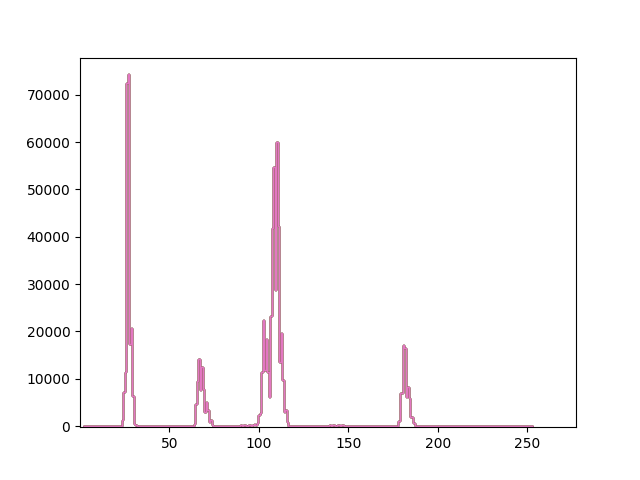

In [25]:
pr = tsv["Photoresistor"].to_numpy()
tsv["Photoresistor"].to_csv("data/photoresistor.csv")

bins, count = np.histogram(pr, bins=300)

plt.stairs(bins, count)
plt.show()

In [26]:
# Through graphical analysis
ACTION_1_MIN = 48
ACTION_1_MAX = 82
ACTION_2_MIN = 164
ACTION_2_MAX = 210

"""
Reading the csv generated by the protocol program, we know that:
- The first action was the right hand
- The right hand option is paired with up (both hands)
- The first reponse was HIGH (so ACTION_2)
- Each action was recorded (15 samples per set) * 5 (set count) * 2 (action + imagined) = 150

Also, through value analysis, values before 5300 and after 687900 shouldn't be used, since they are after the experiment end.

Useful numbers to know:

- Expected n of high samples = low samples = 150 * 2 = 300
- Expected n of rests = n high samples + n low samples = 600
- Expected n of pauses = n sets + 1 = 7
"""

data = tsv.to_numpy()[5300:687900, :]